In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from pprint import pprint

# Number of Detectors

In [57]:
objects = (22, 10, 14, 13, 13)
parts = (15, 11, 12, 12, 13)
scene = (2, 0, 0, 1, 1)
texture = (11, 14, 12, 12, 13)
colour = (1, 1, 0, 1, 2)
print([x + y + z for x, y, z in zip(objects, parts, scene)])

[39, 21, 26, 26, 27]


In [114]:
def numberDetectors():
    plt.figure(figsize=(8, 5))
    
    #############################################################################33
    plt.subplot(1, 2, 1)
    
    N = 5
    # objects, scene, parts, texture, colour
#     imagenet = (22, 2, 15, 11, 1)
#     baseline = (10, 0, 11, 14, 1)
#     data_aug = (14, 0, 12, 22, 0)
#     curric   = (13, 1, 12, 12, 1)
#     c-d      = (13, 1, 13, 13, 2)
    objects = (22, 10, 14, 13, 13)
    parts   = (15, 11, 12, 12, 13)
    scene   = (2, 0, 0, 1, 1)
    texture = (11, 14, 22, 12, 13)
    colour  = (1, 1, 0, 1, 2)

    ind = np.arange(N)    # the x locations for the groups
    width = 0.7       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, objects, width)
    p2 = plt.bar(ind, parts, width,
                 bottom=objects)
    p3 = plt.bar(ind, scene, width,
                 bottom=[x + y for x, y in zip(objects, parts)])
    p4 = plt.bar(ind, texture, width,
                 bottom=[x + y + z for x, y, z in zip(objects, parts, scene)])
    p5 = plt.bar(ind, colour, width,
                 bottom=[x + y + z + zz for x, y, z, zz in zip(objects, parts, scene, texture)])
    
    print(p1[0])
    
    #plt.ylabel('Scores')
    plt.title('Number of unique detectors')
    plt.xticks(ind, ('ImageNet','Baseline', 'DataAug', 'Curric', 'Curric-DataAug'), rotation=50)
    plt.yticks(np.arange(0, 71, 10))
    plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('object', 'part', 'scene', 'texture', 'colour'))
    
    plt.subplot(1, 2, 2)
    detectors = (175, 117, 154, 111, 142)

    #ind = np.arange(N)    # the x locations for the groups
    #width = 0.35       # the width of the bars: can also be len(x) sequence

    pall = plt.bar(ind, detectors, width, color='navy', label="All concepts")

    #plt.ylabel('Scores')
    plt.title('Number of detectors')
    plt.xticks(ind, ('ImageNet','Baseline', 'DataAug', 'Curric', 'Curric-DataAug'), rotation=50)
    plt.yticks(np.arange(0, 201, 50))
    plt.legend(["all concepts"])
    
    plt.tight_layout()
    plt.show()

Rectangle(xy=(-0.35, 0), width=0.7, height=22, angle=0)


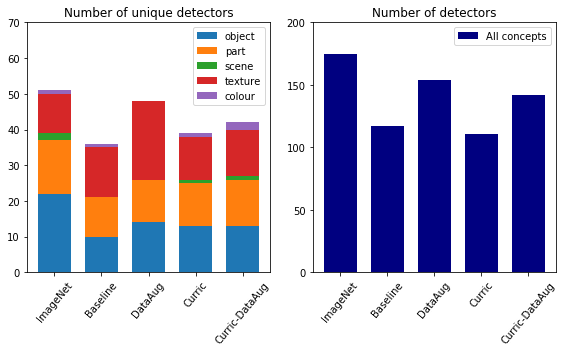

In [115]:
numberDetectors()

# Train and test loss/accuracy

I'm thinking 4 graphs... train loss for 4 experiments, test loss for 4 experiments, train accuracy for 4 experiments, test accuracy for 4 experiments. Unless we combine train and test, so only 2 graphs...

In [2]:
file = "./history/webvision-squeezenet-pretrained/webvision-squeezenet-all-pretrained-30epoch/webvision-squeezenet1_1-pretrained_history"
with open(file, "r", encoding='utf-8') as fin:
    baseline = eval(fin.read())
    
file = "./history/webvision-squeezenet-pretrained/webvision-squeezenet-all-pretrained-reg-30epoch/webvision-squeezenet1_1-pretrained-reg_history"
with open(file, "r", encoding='utf-8') as fin:
    data_aug = eval(fin.read())
    
file = "./history/webvision-squeezenet-pretrained/webvision-squeezenet-curriculum-pretrained-30epoch/webvision-squeezenet1_1-pretrained_history"
with open(file, "r", encoding='utf-8') as fin:
    curric = eval(fin.read())
    
file = "./history/webvision-squeezenet-pretrained/webvision-squeezenet-curriculum-pretrained-reg-30epoch/webvision-squeezenet1_1-pretrained-reg_history"
with open(file, "r", encoding='utf-8') as fin:
    curric_data_aug = eval(fin.read())

In [3]:
print(baseline.keys())

dict_keys(['te_acc', 'te_loss', 'tr_acc', 'tr_loss'])


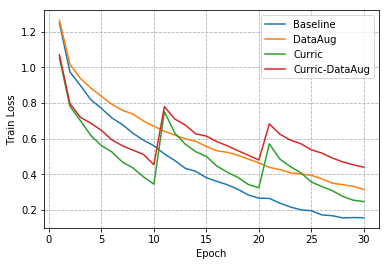

In [17]:
iterations = list(range(1,31))
plt.plot(iterations, baseline['tr_loss'], label="Baseline")
plt.plot(iterations, data_aug['tr_loss'], label="DataAug")
plt.plot(iterations, curric['tr_loss'], label="Curric")
plt.plot(iterations, curric_data_aug['tr_loss'], label="Curric-DataAug")
#plt.xlim(0,31)
plt.grid(linestyle='--')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
#plt.title("Train loss")
plt.show()

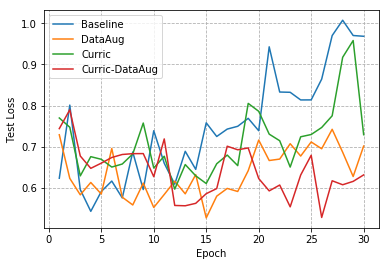

In [18]:
plt.plot(iterations, baseline['te_loss'], label="Baseline")
plt.plot(iterations, data_aug['te_loss'], label="DataAug")
plt.plot(iterations, curric['te_loss'], label="Curric")
plt.plot(iterations, curric_data_aug['te_loss'], label="Curric-DataAug")
plt.grid(linestyle='--')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
#plt.title("Test loss")
plt.show()

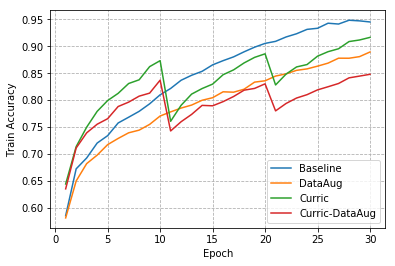

In [19]:
plt.plot(iterations, baseline['tr_acc'], label="Baseline")
plt.plot(iterations, data_aug['tr_acc'], label="DataAug")
plt.plot(iterations, curric['tr_acc'], label="Curric")
plt.plot(iterations, curric_data_aug['tr_acc'], label="Curric-DataAug")
plt.grid(linestyle='--')
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
#plt.title("Train acc")
plt.show()

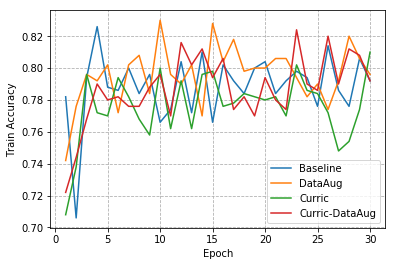

In [20]:
plt.plot(iterations, baseline['te_acc'], label="Baseline")
plt.plot(iterations, data_aug['te_acc'], label="DataAug")
plt.plot(iterations, curric['te_acc'], label="Curric")
plt.plot(iterations, curric_data_aug['te_acc'], label="Curric-DataAug")
plt.grid(linestyle='--')
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
#plt.title("Test acc")
plt.show()